In [1]:
import pandas as pd
import time
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_pickle(r'D:\JupyterNotebook\DataProcess\preprocess_SWsastrawi_stemming.pkl')
dfNo = pd.read_pickle(r'D:\JupyterNotebook\DataProcess\preprocess_SWsastrawi_nostemming.pkl')

In [ ]:
kf = KFold(n_splits=5)
i = 1
for train_index, test_index in kf.split(df):
#     print(test_index)
#     print(train_index[0],"-",train_index[len(train_index)-1])
    print(test_index[0],"+",test_index[len(test_index)-1])
    X_train = df['text'].iloc[train_index[0]:train_index[len(train_index)-1]]
    X_test = df['text'].iloc[test_index[0]:test_index[len(test_index)-1]]
    y_train = df['label'].iloc[train_index[0]:train_index[len(train_index)-1]].astype('int')
    y_test = df['label'].iloc[test_index[0]:test_index[len(test_index)-1]].astype('int')
    
#     vectorizer = TfidfVectorizer()
#     X_train = vectorizer.fit_transform(X_train)
#     X_test = vectorizer.transform(X_test)
    counter = CountVectorizer(min_df=3,
                              dtype=np.double)
    counter.fit(X_train)
    X_train = counter.transform(X_train)
    X_test = counter.transform(X_test)
    
    transformer = TfidfTransformer(norm='l2', sublinear_tf=True)
    X_train = transformer.fit_transform(X_train)
    X_test = transformer.transform(X_test)
    
    X_train,X_test = select_features(X_train, y_train, X_test)
    
    modelknn2 = KNeighborsClassifier(n_neighbors=13, weights='uniform', metric='euclidean')
    modelknn2.fit(X_train,y_train)
    y_pred = modelknn2.predict(X_test)
#     print(classification_report(y_test,y_pred))
    result = modelknn2.score(X_test, y_test)
    print("Fold ke-",i,"=",result)
    print("----------------")
    i+=1

In [3]:
def split(strt,fnsh,df):
    X_test = df['text'].iloc[strt:fnsh]
    y_test = df['label'].iloc[strt:fnsh].astype('int')
    df.drop(df.index[strt:fnsh])
    X_train = df['text']
    y_train = df['label'].astype('int')    
    return X_train, X_test, y_train, y_test

In [4]:
def select_features(train_X, train_y, test_X):
#     total fitur 7343
# 2004
# 1802 nltk
# 2599 sastrawi 1967
    selector = SelectKBest(chi2, k=1967)
    selector.fit(train_X, train_y)
#     new = selector.fit_transform(train_X, train_y)
#     print(new.shape)
    train_X = selector.transform(train_X)
    test_X = selector.transform(test_X)
    return train_X, test_X

In [5]:
def classifier(df,distance_name,k_neighbor):
    print("Nama distance=",distance_name)
    print("Jumlah K tetangga=",k_neighbor)
#     360
#     spl = [0,36,72,108,144,180,216,252,288,324,360]
#     960
    spl = [0,96,192,288,384,480,576,672,768,864,960]
    tempspl = []
    i = 0
    akurasimax=0
    while (i<len(spl)-1):
        if len(spl)-2 != len(tempspl):
            X_train, X_test, y_train, y_test = split(spl[i],spl[i+2],df)
            tempspl.append(spl[i])
    #   ketika array[i+2] == null (looping terakhir)
        elif (len(spl)-len(tempspl)) == 2:
    #       split last and first
            X_test1 = df['text'].iloc[spl[i]:spl[i+1]]
            y_test1 = df['label'].iloc[spl[i]:spl[i+1]].astype('int')
            X_test2 = df['text'].iloc[tempspl[0]:tempspl[1]]
            y_test2 = df['label'].iloc[tempspl[0]:tempspl[1]].astype('int')
    #       concat last and first
            X_test = pd.concat([X_test1, X_test2], axis=0)
            y_test = pd.concat([y_test1, y_test2], axis=0)
    #       split except last and first
            X_train = df['text'].iloc[tempspl[1]:tempspl[len(tempspl)-1]]
            y_train = df['label'].iloc[tempspl[1]:tempspl[len(tempspl)-1]].astype('int')
        
        vectorizer = TfidfVectorizer(min_df=3, dtype=np.double, norm='l2', sublinear_tf=True)
        X_train = vectorizer.fit_transform(X_train)
        X_test = vectorizer.transform(X_test)

#         counter = CountVectorizer(min_df=3,
#                               dtype=np.double)
#         counter.fit(X_train)
#         X_train = counter.transform(X_train)
#         X_test = counter.transform(X_test)

#         transformer = TfidfTransformer(norm='l2', sublinear_tf=True)
#         X_train = transformer.fit_transform(X_train)
#         X_test = transformer.transform(X_test)
        
#         X_train,X_test = select_features(X_train, y_train, X_test)

        modelknn = KNeighborsClassifier(n_neighbors=k_neighbor, weights='uniform', metric=distance_name)
        modelknn.fit(X_train,y_train)
        y_pred = modelknn.predict(X_test)
#         print(classification_report(y_test,y_pred))
        result = modelknn.score(X_test, y_test)
        print("Fold ke-",i+1,"=",result)
        if (result >= akurasimax):
            akurasimax = result
            foldke = i+1
        i+=1
    print("Akurasi terbaik adalah",akurasimax,"pada fold ke-",foldke)
    print("------------------------------------")
    return akurasimax

Dengan Stemming
Nama distance= euclidean
Jumlah K tetangga= 1
Fold ke- 1 = 1.0
Fold ke- 2 = 1.0
Fold ke- 3 = 1.0
Fold ke- 4 = 1.0
Fold ke- 5 = 1.0
Fold ke- 6 = 1.0
Fold ke- 7 = 1.0
Fold ke- 8 = 1.0
Fold ke- 9 = 1.0
Fold ke- 10 = 0.13541666666666666
Akurasi terbaik adalah 1.0 pada fold ke- 9
------------------------------------
Dengan Stemming
Nama distance= euclidean
Jumlah K tetangga= 3
Fold ke- 1 = 0.84375
Fold ke- 2 = 0.8541666666666666
Fold ke- 3 = 0.8645833333333334
Fold ke- 4 = 0.8697916666666666
Fold ke- 5 = 0.890625
Fold ke- 6 = 0.9270833333333334
Fold ke- 7 = 0.9375
Fold ke- 8 = 0.921875
Fold ke- 9 = 0.8958333333333334
Fold ke- 10 = 0.6458333333333334
Akurasi terbaik adalah 0.9375 pada fold ke- 7
------------------------------------
Dengan Stemming
Nama distance= euclidean
Jumlah K tetangga= 5
Fold ke- 1 = 0.8072916666666666
Fold ke- 2 = 0.7864583333333334
Fold ke- 3 = 0.78125
Fold ke- 4 = 0.8020833333333334
Fold ke- 5 = 0.859375
Fold ke- 6 = 0.9166666666666666
Fold ke- 7 = 0.

Fold ke- 5 = 0.8489583333333334
Fold ke- 6 = 0.8958333333333334
Fold ke- 7 = 0.9010416666666666
Fold ke- 8 = 0.875
Fold ke- 9 = 0.8489583333333334
Fold ke- 10 = 0.71875
Akurasi terbaik adalah 0.9010416666666666 pada fold ke- 7
------------------------------------
Dengan Stemming
Nama distance= minkowski
Jumlah K tetangga= 9
Fold ke- 1 = 0.796875
Fold ke- 2 = 0.796875
Fold ke- 3 = 0.7916666666666666
Fold ke- 4 = 0.8125
Fold ke- 5 = 0.8489583333333334
Fold ke- 6 = 0.8802083333333334
Fold ke- 7 = 0.875
Fold ke- 8 = 0.8385416666666666
Fold ke- 9 = 0.8177083333333334
Fold ke- 10 = 0.734375
Akurasi terbaik adalah 0.8802083333333334 pada fold ke- 6
------------------------------------
Dengan Stemming
Nama distance= minkowski
Jumlah K tetangga= 11
Fold ke- 1 = 0.796875
Fold ke- 2 = 0.7864583333333334
Fold ke- 3 = 0.765625
Fold ke- 4 = 0.78125
Fold ke- 5 = 0.84375
Fold ke- 6 = 0.8697916666666666
Fold ke- 7 = 0.859375
Fold ke- 8 = 0.8489583333333334
Fold ke- 9 = 0.8333333333333334
Fold ke- 10 = 

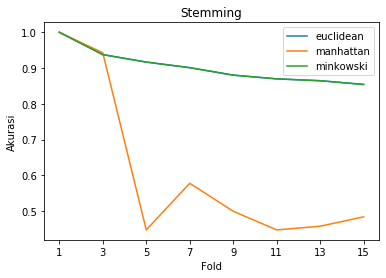

Tanpa Stemming
Nama distance= euclidean
Jumlah K tetangga= 1
Fold ke- 1 = 1.0
Fold ke- 2 = 1.0
Fold ke- 3 = 1.0
Fold ke- 4 = 1.0
Fold ke- 5 = 1.0
Fold ke- 6 = 1.0
Fold ke- 7 = 1.0
Fold ke- 8 = 1.0
Fold ke- 9 = 1.0
Fold ke- 10 = 0.11979166666666667
Akurasi terbaik adalah 1.0 pada fold ke- 9
------------------------------------
Tanpa Stemming
Nama distance= euclidean
Jumlah K tetangga= 3
Fold ke- 1 = 0.8333333333333334
Fold ke- 2 = 0.8333333333333334
Fold ke- 3 = 0.84375
Fold ke- 4 = 0.8697916666666666
Fold ke- 5 = 0.8697916666666666
Fold ke- 6 = 0.9114583333333334
Fold ke- 7 = 0.9375
Fold ke- 8 = 0.921875
Fold ke- 9 = 0.8854166666666666
Fold ke- 10 = 0.640625
Akurasi terbaik adalah 0.9375 pada fold ke- 7
------------------------------------
Tanpa Stemming
Nama distance= euclidean
Jumlah K tetangga= 5
Fold ke- 1 = 0.8072916666666666
Fold ke- 2 = 0.7760416666666666
Fold ke- 3 = 0.7760416666666666
Fold ke- 4 = 0.8177083333333334
Fold ke- 5 = 0.8958333333333334
Fold ke- 6 = 0.94270833333333

Fold ke- 4 = 0.8177083333333334
Fold ke- 5 = 0.8645833333333334
Fold ke- 6 = 0.90625
Fold ke- 7 = 0.8854166666666666
Fold ke- 8 = 0.8854166666666666
Fold ke- 9 = 0.8645833333333334
Fold ke- 10 = 0.7447916666666666
Akurasi terbaik adalah 0.90625 pada fold ke- 6
------------------------------------
Tanpa Stemming
Nama distance= minkowski
Jumlah K tetangga= 9
Fold ke- 1 = 0.8125
Fold ke- 2 = 0.8072916666666666
Fold ke- 3 = 0.8020833333333334
Fold ke- 4 = 0.8020833333333334
Fold ke- 5 = 0.8541666666666666
Fold ke- 6 = 0.9010416666666666
Fold ke- 7 = 0.875
Fold ke- 8 = 0.8645833333333334
Fold ke- 9 = 0.8489583333333334
Fold ke- 10 = 0.7604166666666666
Akurasi terbaik adalah 0.9010416666666666 pada fold ke- 6
------------------------------------
Tanpa Stemming
Nama distance= minkowski
Jumlah K tetangga= 11
Fold ke- 1 = 0.8020833333333334
Fold ke- 2 = 0.8072916666666666
Fold ke- 3 = 0.7864583333333334
Fold ke- 4 = 0.8020833333333334
Fold ke- 5 = 0.8541666666666666
Fold ke- 6 = 0.8958333333333

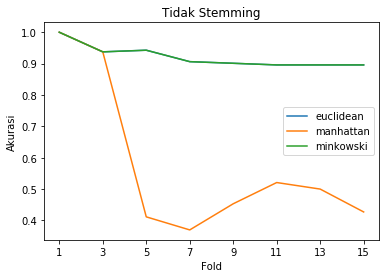

Lama Proses 286.59330105781555 seconds
Wall time: 4min 46s


In [6]:
%%time
# %%capture cap --no-stderr
start_time = time.time()
dfcount = [df,dfNo]
distancecount = ['euclidean','manhattan','minkowski']
kcount = [1,3,5,7,9,11,13,15]
for x in range(2):
    arrd1 = []
    arrd2 = []
    arrd3 = []
    for y in range(len(distancecount)):
        maxresult = []
        for z in range(len(kcount)):
            if x==0:
                print('Dengan Stemming')
            else:
                print('Tanpa Stemming')
            tempmax = classifier(dfcount[x],distancecount[y],kcount[z])
            maxresult.append(tempmax)
            if y==0:
                arrd1.append(tempmax)
            elif y==1:
                arrd2.append(tempmax)
            elif y==2:
                arrd3.append(tempmax)
#         tapi fold yang dipakai beda beda
    plt.plot(kcount, arrd1, label = "euclidean")
    plt.plot(kcount, arrd2, label = "manhattan")
    plt.plot(kcount, arrd3, label = "minkowski")
    plt.xticks(kcount)
    if x==0:
        plt.title("Stemming")
    else:
        plt.title("Tidak Stemming")
    plt.xlabel('Fold')
    plt.ylabel('Akurasi')
    plt.legend()
    plt.pause(0.05)
plt.show
print("Lama Proses %s seconds" % (time.time() - start_time))
# with open('5000_fitur_SWnltkv2.txt', 'w') as f:
#     f.write(cap.stdout)

# try--

In [ ]:
X_train = df['text'].iloc[72:]
X_test = df['text'].iloc[:72]
y_train = df['label'].iloc[72:].astype('int')
y_test = df['label'].iloc[:72].astype('int')

In [7]:
X = df['text']
y = df['label'].astype('int')
# X = dfNo['text']
# y = dfNo['label'].astype('int')

In [8]:
# Pembentukan tf-idf untuk pembobotan
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)
print(X)
# X_train = vectorizer.fit_transform(X_train)
# X_test = vectorizer.transform(X_test)

  (0, 7907)	0.015086561338156555
  (0, 2101)	0.024268625665715183
  (0, 1468)	0.017191289669124407
  (0, 8306)	0.05717676493779986
  (0, 15106)	0.05717676493779986
  (0, 8873)	0.0240937374940229
  (0, 2823)	0.02301801283951414
  (0, 6491)	0.021681209935831964
  (0, 2871)	0.03594431191673091
  (0, 1170)	0.021188451285573794
  (0, 720)	0.020991937374219168
  (0, 10390)	0.03837607996216226
  (0, 1136)	0.019134447777819804
  (0, 1730)	0.026426554111359177
  (0, 15726)	0.021638943016135597
  (0, 5942)	0.02930107760438275
  (0, 6694)	0.04630753146351984
  (0, 7944)	0.028865382485602425
  (0, 9154)	0.053997717940781384
  (0, 8677)	0.07474760620223786
  (0, 6281)	0.11435352987559971
  (0, 1076)	0.03837607996216226
  (0, 1406)	0.04538405420662291
  (0, 14065)	0.053997717940781384
  (0, 6149)	0.048563101203641386
  :	:
  (1079, 7907)	0.02108894384858533
  (1079, 2823)	0.09652807609328515
  (1079, 15726)	0.030248274870685828
  (1079, 7117)	0.04556045966211409
  (1079, 6126)	0.014937357343670537
 

In [14]:
X.todense()
print(vectorizer.get_feature_names())

['aaaa', 'aacsb', 'aad', 'aagn', 'aam', 'aan', 'aang', 'ab', 'aba', 'abad', 'abadi', 'abah', 'abai', 'abalone', 'abang', 'abaya', 'abbas', 'abd', 'abdi', 'abdillah', 'abdul', 'abdulamir', 'abdulazis', 'abdulaziz', 'abdullah', 'abdurahman', 'abdurrahman', 'abe', 'aberdeen', 'abest', 'abg', 'abi', 'abidin', 'abilene', 'abimana', 'abnormal', 'aboday', 'abon', 'aboul', 'abpm', 'abqaiq', 'abraham', 'abrar', 'abs', 'absah', 'absen', 'abshar', 'absm', 'absolut', 'abu', 'abubakar', 'abun', 'aburizal', 'ac', 'academy', 'acak', 'acap', 'acapkali', 'acar', 'acara', 'acaramenurutnya', 'acau', 'accor', 'accord', 'accountable', 'ace', 'aceh', 'acep', 'acer', 'achmad', 'achsanul', 'acl', 'acquisition', 'acset', 'acst', 'act', 'action', 'activision', 'actuation', 'acu', 'acung', 'ad', 'ada', 'adab', 'adah', 'adakan', 'adalah', 'adam', 'adamas', 'adamatine', 'adang', 'adapaun', 'adaptasi', 'adaptif', 'adaptor', 'adapula', 'adapun', 'adaro', 'adat', 'ade', 'adegan', 'adek', 'adelaide', 'adh', 'adhadirgh

In [10]:
corpus = df['text']

In [11]:
# print(vectorizer.vocabulary_)
# print(len(vectorizer.get_feature_names()))
df_coba = pd.DataFrame(X.todense().T,
                      index=vectorizer.get_feature_names())
#                       column=[f'D{i+1}' for i in range(len(corpus))])
df_coba

,0,1,2,3,4,5,6,7,8,9,...,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079
aaaa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aacsb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aagn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuxxy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zyl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zylgwyn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zylvechia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
%%time
modelknn2 = KNeighborsClassifier(n_neighbors=11, weights='uniform', metric='euclidean')
modelknn2.fit(X_train,y_train)

In [ ]:
filename = 'D:\JupyterNotebook\Model\model_nostemming_173_splitmanual.sav'
joblib.dump(modelknn2, filename)

In [ ]:
filename = 'D:\JupyterNotebook\Model\model_stemming.sav'
loaded_model = joblib.load(filename)
# result = loaded_model.score(X_test, y_test)
# print(result)

In [ ]:
y_pred = modelknn2.predict(X_test)
y_pred

In [ ]:
y_pred = loaded_model.predict(X_test)
y_pred

In [ ]:
modelknn2.predict_proba(X_test)

In [ ]:
f1score_, recall_, precision_, cm_ = evaluation(d_test.label, y_pred_sw, label)
print(" f1-score: {}\n precision: {}\n recall: {}".format(f1score, precision, recall))

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
result = modelknn2.score(X_test, y_test)
print(result)

In [ ]:
result_class = pd.DataFrame({'Actual Result':y_test, 'Predicted Result':y_pred})
result_class

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(result_class)